In [2]:
# pandas for data structures and operations for manipulating numerical tables and time series
import pandas as pd
from pandas.plotting import scatter_matrix

# matplotlib.pyplot for data plots
import matplotlib.pyplot as plt

# sklearn for machine learning methods
from sklearn import tree
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# for numeric calculations
import numpy as np

In [3]:
movies = pd.read_csv('./ml-latest-small/movies.csv', index_col=None, na_values=['NA'])

In [4]:
movies.shape

(9742, 3)

In [5]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
movies['movieId'].max()

193609

In [7]:
ratings = pd.read_csv('./ml-latest-small/ratings.csv', index_col=None, na_values=['NA'])

In [8]:
ratings.shape

(100836, 4)

In [9]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [10]:
tags = pd.read_csv('./ml-latest-small/tags.csv', index_col=None, na_values=['NA'])

In [11]:
tags.shape

(3683, 4)

In [12]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [13]:
links = pd.read_csv('./ml-latest-small/links.csv', index_col=None, na_values=['NA'])

In [14]:
links.shape

(9742, 3)

In [15]:
links.sample(10)

,movieId,imdbId,tmdbId
9330,160527,66806,90351.0
7910,95193,143808,13761.0
7270,74683,282744,19962.0
3924,5515,120263,34070.0
9402,164753,5340362,379990.0
1131,1479,120053,10003.0
189,222,112679,22625.0
1814,2414,90357,11904.0
6685,58105,416236,8204.0
4205,6078,83943,10724.0


In [16]:
mvrt = pd.merge(ratings, movies, on='movieId')

In [17]:
mvrt.shape

(100836, 6)

In [18]:
mvrt.sample(20)

,userId,movieId,rating,timestamp,title,genres
21184,187,1199,5.0,1161850221,Brazil (1985),Fantasy|Sci-Fi
85029,564,76293,3.5,1478453894,Date Night (2010),Action|Comedy|Romance
90081,326,133771,5.0,1463936463,The Lobster (2015),Comedy|Romance|Sci-Fi
85502,217,20,2.0,955941424,Money Train (1995),Action|Comedy|Crime|Drama|Thriller
75912,105,71033,4.0,1446572112,"Secret in Their Eyes, The (El secreto de sus o...",Crime|Drama|Mystery|Romance|Thriller
40612,489,1028,4.5,1332774291,Mary Poppins (1964),Children|Comedy|Fantasy|Musical
97792,387,7895,3.5,1166936519,Bring Me the Head of Alfredo Garcia (1974),Crime|Drama|Thriller
11166,448,2090,4.0,1019126736,"Rescuers, The (1977)",Adventure|Animation|Children|Crime|Drama
15450,555,3441,3.0,978823282,Red Dawn (1984),Action|Drama|War
38455,301,8636,3.0,1211377699,Spider-Man 2 (2004),Action|Adventure|Sci-Fi|IMAX


In [19]:
all_genres = movies['genres'].str.split('|', expand=True).stack()
unique_genres = all_genres.value_counts()
print("Number of occurrences for each genre:")
print(unique_genres)

Number of occurrences for each genre:
Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
Name: count, dtype: int64


In [20]:
rows_with_no_genre = mvrt[mvrt['genres'] == '(no genres listed)']

In [21]:
rows_with_no_genre.movieId.value_counts()

movieId
122896    7
141866    3
142456    2
152037    2
166024    2
171495    2
172591    2
147250    1
171749    1
132084    1
181719    1
141131    1
156605    1
122888    1
174403    1
165489    1
182727    1
149330    1
143410    1
129250    1
167570    1
176601    1
172497    1
114335    1
169034    1
159779    1
181413    1
155589    1
171891    1
171631    1
159161    1
134861    1
173535    1
161008    1
Name: count, dtype: int64

In [22]:
mvrt = mvrt[~mvrt['movieId'].isin(rows_with_no_genre['movieId'])]

In [23]:
mvrt.shape

(100789, 6)

In [24]:
all_genres = mvrt['genres'].str.split('|', expand=True).stack()
unique_genres = all_genres.value_counts()
print("Number of occurrences for each genre:")
print(unique_genres)

Number of occurrences for each genre:
Drama          41928
Comedy         39053
Action         30635
Thriller       26452
Adventure      24161
Romance        18124
Sci-Fi         17243
Crime          16681
Fantasy        11834
Children        9208
Mystery         7674
Horror          7291
Animation       6988
War             4859
IMAX            4145
Musical         4138
Western         1930
Documentary     1219
Film-Noir        870
Name: count, dtype: int64


In [25]:
mvrt.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

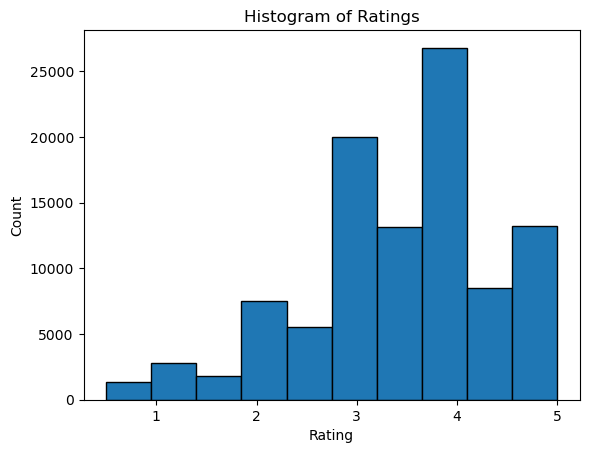

In [26]:
plt.hist(mvrt['rating'], bins=10, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Histogram of Ratings')
plt.show()

In [27]:
genres_list = ['Drama', 'Comedy', 'Action', 'Thriller', 'Adventure', 'Romance',
               'Sci-Fi', 'Crime', 'Fantasy', 'Children', 'Mystery', 'Horror',
               'Animation', 'War', 'IMAX', 'Musical', 'Western', 'Documentary', 'Film-Noir']

In [28]:
def average_rating_by_genre(data, genre_list):
    genres_expanded = data['genres'].str.get_dummies(sep='|')

    # Step 2: Concatenate 'genres_expanded' with 'data'
    data_genres = pd.concat([data, genres_expanded], axis=1)

    # Step 3: Calculate average rating for each genre
    average_ratings = {}
    for genre in genre_list:
        if genre in data_genres.columns:
            average_rating = data_genres[data_genres[genre] == 1]['rating'].mean()
            average_ratings[genre] = average_rating

    return average_ratings

In [29]:
result = average_rating_by_genre(mvrt,genres_list)

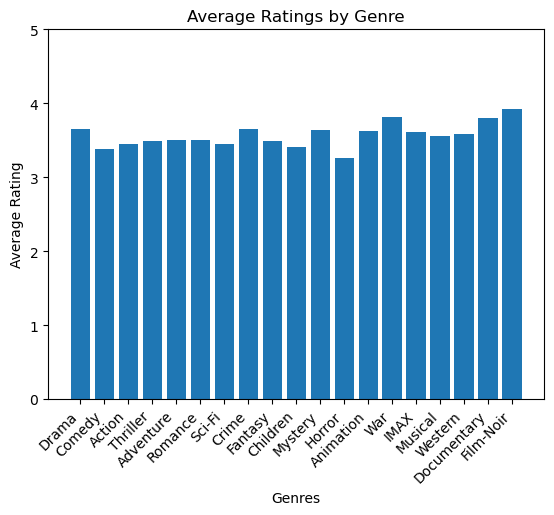

In [30]:
plt.bar(result.keys(), result.values())
plt.xlabel('Genres')
plt.ylabel('Average Rating')
plt.title('Average Ratings by Genre')
plt.ylim(0, 5)  # Set the y-axis limit to 5
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

In [31]:
mvrt['year_released'] = mvrt['title'].str.extract(r'\((\d{4})\)', expand=False)
mvrt['title'] = mvrt['title'].str.replace(r'\s*\(\d{4}\)\s*', '', regex=True)

In [32]:
mvrt.head()

,userId,movieId,rating,timestamp,title,genres,year_released
0,1,1,4.0,964982703,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,5,1,4.0,847434962,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
2,7,1,4.5,1106635946,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
3,15,1,2.5,1510577970,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
4,17,1,4.5,1305696483,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995


In [33]:
mvrt.isnull().sum()

userId           0
movieId          0
rating           0
timestamp        0
title            0
genres           0
year_released    8
dtype: int64

In [34]:
mvrt_movies_with_no_year = mvrt[mvrt['year_released'].isnull()]

In [35]:
mvrt_movies_with_no_year

,userId,movieId,rating,timestamp,title,genres,year_released
93457,209,140956,3.5,1524522239,Ready Player One,Action|Sci-Fi|Thriller,NaN
93458,305,140956,4.5,1533043577,Ready Player One,Action|Sci-Fi|Thriller,NaN
93459,380,140956,3.0,1534176158,Ready Player One,Action|Sci-Fi|Thriller,NaN
93460,514,140956,3.0,1533946119,Ready Player One,Action|Sci-Fi|Thriller,NaN
93476,210,40697,4.0,1527266191,Babylon 5,Sci-Fi,NaN
93477,528,40697,0.5,1391736467,Babylon 5,Sci-Fi,NaN
96413,306,149334,3.0,1518380372,Nocturnal Animals,Drama|Thriller,NaN
99001,462,162414,5.0,1478489531,Moonlight,Drama,NaN


In [36]:
mvrt.loc[mvrt['title'] == 'Ready Player One', 'year_released'] = 2018
mvrt.loc[mvrt['title'] == 'Babylon 5', 'year_released'] = 1994
mvrt.loc[mvrt['title'] == 'Nocturnal Animals', 'year_released'] = 2016
mvrt.loc[mvrt['title'] == 'Moonlight', 'year_released'] = 2016

In [37]:
mvrt_movies_with_no_year1 = mvrt[pd.isna(mvrt['year_released'])]
mvrt_movies_with_no_year1.shape

(0, 7)

In [38]:
mvrt.dtypes

userId             int64
movieId            int64
rating           float64
timestamp          int64
title             object
genres            object
year_released     object
dtype: object

In [39]:
mvrt['year_released'] = pd.to_numeric(mvrt['year_released'], errors='coerce')

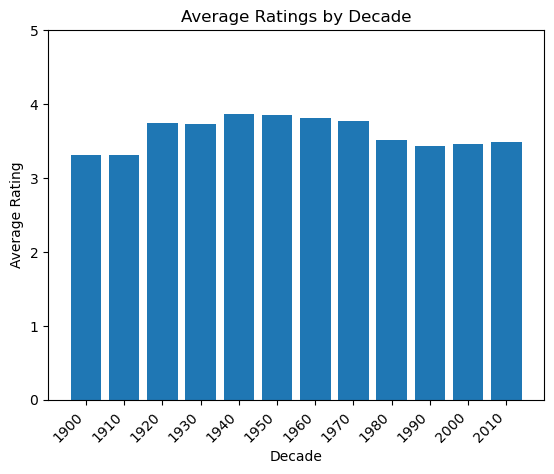

In [40]:
mvrt['decade'] = (mvrt['year_released'] // 10) * 10
average_ratings_by_decade = mvrt.groupby('decade')['rating'].mean()
plt.bar(average_ratings_by_decade.index.astype(str), average_ratings_by_decade.values)
plt.xlabel('Decade')
plt.ylabel('Average Rating')
plt.ylim(0, 5)  # Set the y-axis limit to 5
plt.title('Average Ratings by Decade')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

In [41]:
vote_counts = mvrt['movieId'].value_counts()
mvrt['vote_count'] = mvrt['movieId'].map(vote_counts)

In [42]:
m = mvrt['vote_count'].quantile(0.90)
print(m)

143.0


In [43]:
vote_counts = mvrt['movieId'].value_counts().reset_index()
vote_counts.columns = ['movieId', 'vote_count']

# Merge 'movies' with 'vote_count' based on 'movieId'
merged_movies = pd.merge(movies, vote_counts, on='movieId', how='left')

In [44]:
merged_movies

,movieId,title,genres,vote_count
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0
4,5,Father of the Bride Part II (1995),Comedy,49.0
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,1.0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,1.0
9739,193585,Flint (2017),Drama,1.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,1.0


In [45]:
m = merged_movies['vote_count'].quantile(0.90)
print(m)

27.0


In [46]:
q_movies = merged_movies.copy().loc[merged_movies['vote_count'] >= m]
q_movies

,movieId,title,genres,vote_count
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,52.0
4,5,Father of the Bride Part II (1995),Comedy,49.0
5,6,Heat (1995),Action|Crime|Thriller,102.0
...,...,...,...,...
8879,134130,The Martian (2015),Adventure|Drama|Sci-Fi,48.0
8900,134853,Inside Out (2015),Adventure|Animation|Children|Comedy|Drama|Fantasy,43.0
8990,139385,The Revenant (2015),Adventure|Drama,31.0
9223,152081,Zootopia (2016),Action|Adventure|Animation|Children|Comedy,32.0


In [47]:
average_ratings = mvrt.groupby('movieId')['rating'].mean().reset_index()
average_ratings.columns = ['movieId', 'average_rating']

# Merge 'merged_movies' with 'average_ratings' based on 'movieId'
final_merged_df = pd.merge(merged_movies, average_ratings, on='movieId', how='left')

In [48]:
C = final_merged_df['average_rating'].mean()
print(C)

3.2620668706545675


In [49]:
q_movies = final_merged_df.copy().loc[merged_movies['vote_count'] >= m]
q_movies

,movieId,title,genres,vote_count,average_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52.0,3.259615
4,5,Father of the Bride Part II (1995),Comedy,49.0,3.071429
5,6,Heat (1995),Action|Crime|Thriller,102.0,3.946078
...,...,...,...,...,...
8879,134130,The Martian (2015),Adventure|Drama|Sci-Fi,48.0,4.000000
8900,134853,Inside Out (2015),Adventure|Animation|Children|Comedy|Drama|Fantasy,43.0,3.813953
8990,139385,The Revenant (2015),Adventure|Drama,31.0,3.903226
9223,152081,Zootopia (2016),Action|Adventure|Animation|Children|Comedy,32.0,3.890625


In [50]:
def war(x, m=m, c=C):
    v = x['vote_count']
    r = x['average_rating']
    return (v/(v+m) * r) + (m/(m+v) * c)

In [51]:
q_movies['score'] = final_merged_df.apply(war, axis=1)
print(q_movies['score'])

0       3.847421
1       3.398364
2       3.260453
4       3.139155
5       3.802913
          ...   
8879    3.734344
8900    3.601083
8990    3.604755
9223    3.602980
9433    3.593996
Name: score, Length: 976, dtype: float64


In [52]:
q_movies

,movieId,title,genres,vote_count,average_rating,score
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930,3.847421
1,2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818,3.398364
2,3,Grumpier Old Men (1995),Comedy|Romance,52.0,3.259615,3.260453
4,5,Father of the Bride Part II (1995),Comedy,49.0,3.071429,3.139155
5,6,Heat (1995),Action|Crime|Thriller,102.0,3.946078,3.802913
...,...,...,...,...,...,...
8879,134130,The Martian (2015),Adventure|Drama|Sci-Fi,48.0,4.000000,3.734344
8900,134853,Inside Out (2015),Adventure|Animation|Children|Comedy|Drama|Fantasy,43.0,3.813953,3.601083
8990,139385,The Revenant (2015),Adventure|Drama,31.0,3.903226,3.604755
9223,152081,Zootopia (2016),Action|Adventure|Animation|Children|Comedy,32.0,3.890625,3.602980


In [53]:
import os
current_directory = os.getcwd()
current_directory

'/Users/daniel/Documents/4. Semester/Exam'

In [54]:
q_movies.to_csv(current_directory + '/q_movies', index=False)

In [55]:
mvrt.to_csv(current_directory + '/year.csv', index=False)

In [56]:
q_movies = q_movies.sort_values('score', ascending=False)

#Print the top 15 movies
q_movies[['title', 'vote_count', 'average_rating', 'score']].head(15)

,title,vote_count,average_rating,score
277,"Shawshank Redemption, The (1994)",317.0,4.429022,4.337430
659,"Godfather, The (1972)",192.0,4.289062,4.162447
2226,Fight Club (1999),218.0,4.272936,4.161534
224,Star Wars: Episode IV - A New Hope (1977),251.0,4.231076,4.136963
46,"Usual Suspects, The (1995)",204.0,4.237745,4.123705
257,Pulp Fiction (1994),307.0,4.197068,4.121484
461,Schindler's List (1993),220.0,4.225000,4.119740
1939,"Matrix, The (1999)",278.0,4.192446,4.110085
898,Star Wars: Episode V - The Empire Strikes Back...,211.0,4.215640,4.107461
314,Forrest Gump (1994),329.0,4.164134,4.095719


In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [58]:
movies['score'] = q_movies['score']

In [59]:
tfidf = TfidfVectorizer(stop_words='english')

In [60]:
movies['genres'] = movies['genres'].fillna('')
movies['score'] = movies['score'].fillna(0)

In [61]:
movies[movies['title'] == 'Shawshank Redemption, The (1994)']

,movieId,title,genres,score
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.33743


In [62]:
movies.to_csv(current_directory + '/movies.csv', index=False)

In [63]:
tfidf_matrix = tfidf.fit_transform(movies['genres'])

In [64]:
tfidf_matrix.shape

(9742, 23)

In [65]:
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix for each vs each movie
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [66]:
print(cosine_sim)

[[1.         0.81357774 0.15276924 ... 0.         0.4210373  0.26758648]
 [0.81357774 1.         0.         ... 0.         0.         0.        ]
 [0.15276924 0.         1.         ... 0.         0.         0.57091541]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.4210373  0.         0.         ... 0.         1.         0.        ]
 [0.26758648 0.         0.57091541 ... 0.         0.         1.        ]]


In [67]:
indices = pd.Series(movies.index, index=movies['genres']).drop_duplicates()
indices

genres
Adventure|Animation|Children|Comedy|Fantasy       0
Adventure|Children|Fantasy                        1
Comedy|Romance                                    2
Comedy|Drama|Romance                              3
Comedy                                            4
                                               ... 
Action|Animation|Comedy|Fantasy                9737
Animation|Comedy|Fantasy                       9738
Drama                                          9739
Action|Animation                               9740
Comedy                                         9741
Length: 9742, dtype: int64

In [68]:
def get_recommendations(genre, cosine_sim=cosine_sim):
        # Get the indices of movies with the specified genre
        genre_list = genre.split('|')
        sorted_genre_list = sorted(genre_list)
        separator = '|'
        genre = separator.join(sorted_genre_list)
        genre_indices = indices[genre]

        # Initialize an empty list to store similarity scores
        sim_scores = []

        # Iterate over the genre indices and get the cosine similarity scores
        for idx in genre_indices:
            sim_scores.extend(list(enumerate(cosine_sim[idx])))

        # Sort the movies based on the similarity scores
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

        # Get the scores of the 1000 most similar movies
        sim_scores = sim_scores[1:1000]

        # Get the movie indices
        movie_indices = [i[0] for i in sim_scores]

        # Return the top 10 most similar movies
        genre_list = genre.split('|')
        movies_with_score = movies[['title', 'genres', 'score']].iloc[movie_indices]
        sorted_genre_list = sorted(genre_list)
        filtered_movies = movies[(movies['score'] > 0) & movies['genres'].apply(lambda x: all(genre in x for genre in sorted_genre_list))]
        sorted_movies = filtered_movies.sort_values(by='score', ascending=False)
        return sorted_movies.drop_duplicates(subset='title').head(5)

In [69]:
get_recommendations('Crime|Action')

,movieId,title,genres,score
2226,2959,Fight Club (1999),Action|Crime|Drama|Thriller,4.161534
6710,58559,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,4.088499
7372,79132,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,3.938681
4176,6016,City of God (Cidade de Deus) (2002),Action|Adventure|Crime|Drama|Thriller,3.912508
254,293,Léon: The Professional (a.k.a. The Professiona...,Action|Crime|Drama|Thriller,3.891099


In [70]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from scipy.sparse import coo_matrix
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [73]:
# Split the data into train and test sets, and then use only the train set
mvrt_train=mvrt

# Pivot the data to create a user-item matrix
user_movie_matrix = mvrt_train.pivot_table(index='userId', columns='movieId', values='rating', fill_value=0)

# Convert the DataFrame to a numpy array
user_movie_array = user_movie_matrix.to_numpy()

train_data, test_data = train_test_split(user_movie_array, test_size=0.2, random_state=42)

data = train_data
print(repr(train_data))
class CollaborativeFilteringRecommender:
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors
        self.user_similarity = None

    def fit(self, train_data):
        # Compute user-user similarity matrix using cosine similarity
        self.user_similarity = cosine_similarity(train_data)
        plt.figure(figsize=(10, 8))
        sns.heatmap(self.user_similarity, cmap="YlGnBu", annot=True, fmt=".2f", linewidths=.5)
        # Set plot labels and title
        plt.xlabel("User ID")
        plt.ylabel("User ID")
        plt.title("User-User Similarity Matrix")

        # Display the plot
        plt.show()

    def predict(self, user_indices, train_data):
        # Compute weighted average of ratings from similar users for each user index
        recommendations = []
        for user_index in user_indices:
            user_sim_scores = self.user_similarity[user_index]
            top_sim_users = np.argsort(user_sim_scores)[-self.n_neighbors - 1:-1]  # Exclude the user itself

            user_ratings = train_data[top_sim_users, :]
            user_sim_scores = user_sim_scores[top_sim_users]

            # Weighted average of ratings from similar users
            pred_ratings = np.dot(user_sim_scores, user_ratings) / np.sum(user_sim_scores)
            recommendations.append(pred_ratings)

        return recommendations

# Example usage:
# Instantiate the recommender system
recommender = CollaborativeFilteringRecommender(n_neighbors=5)

# Train the recommender system
recommender.fit(data)

# Make recommendations for specified user indices
user_indices = [4, 8, 400]
recommendations = recommender.predict(user_indices, data)

array([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [4.5, 2. , 4. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [4. , 4. , 0. , ..., 0. , 0. , 0. ],
       [4. , 4. , 0. , ..., 0. , 0. , 0. ]])


In [72]:
# Print the titles of 3 movies the user likes and 3 recommended movies
for i, user_index in enumerate(user_indices):
    print(f"User {user_index}:")
    print("     Known positives:")
    known_positives = mvrt[(mvrt['userId'] == user_index) & (mvrt['rating'] > 4)].nlargest(3, 'rating')
    for _, row in known_positives.iterrows():
        print("             %s" % row['title'])
    
    print("     Recommended:")
    for item_index in recommendations[i].argsort()[-3:][::-1]:
        movie_id = mvrt['movieId'].unique()[item_index]
        movie_title = mvrt[mvrt['movieId'] == movie_id]['title'].iloc[0]
        print("             %s" % movie_title)

# Make predictions for the test set
test_predictions = recommender.predict(range(len(test_data)), train_data)

# Calculate mean squared error
mse = mean_squared_error(test_data, test_predictions)
print("Mean Squared Error:", mse)

User 4:
     Known positives:
             Star Wars: Episode IV - A New Hope
             Fugitive, The
             Silence of the Lambs, The
     Recommended:
             Election
             Requiem for a Dream
             She's the One
User 8:
     Known positives:
             Usual Suspects, The
             Schindler's List
             Dances with Wolves
     Recommended:
             Maverick
             Vampire in Brooklyn
             Universal Soldier: The Return
User 400:
     Known positives:
             Heat
             Seven (a.k.a. Se7en)
             Usual Suspects, The
     Recommended:
             Rabbit-Proof Fence
             From Russia with Love
             G.I. Joe: The Rise of Cobra
Mean Squared Error: 0.36988720044832996
